In [2]:
import gzip
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyBioInfo.IO.File import BedFile

# Length distribution of pseudogene

In [4]:
bed = "/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.annotation.transcripts.bed.gz"
transcripts = {t.name: t for t in BedFile(bed)}
tsv = "/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.annotation.tsv"
anno_t = pd.read_csv(tsv, sep="\t", index_col=0)

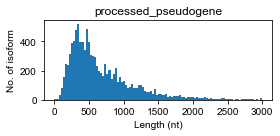

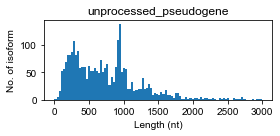

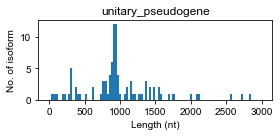

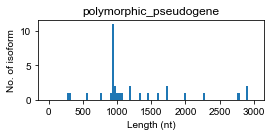

In [21]:
gtypes = ["processed_pseudogene", "unprocessed_pseudogene", "unitary_pseudogene", "polymorphic_pseudogene"]
for gtype in gtypes:
    d = anno_t[(anno_t["GeneType"] == gtype) & (anno_t["Canonical"])]
    vs = []
    for tid in d.index:
        vs.append(len(transcripts[tid]))
    plt.figure(figsize=(4, 2))
    plt.title(gtype)
    plt.hist(vs, range=(0, 3000), bins=100)
    plt.xlabel("Length (nt)")
    plt.ylabel("No. of isoform")
    plt.tight_layout()
    plt.show()
    plt.close()

# NanoNASC-seq

In [2]:
dat = pd.read_excel("../../1_NanoNASCseq/NanoNASCseq_summary_selected_qc.xls")
dat = dat[(dat["Strain"] == "K562") & (dat["Time"] == 3) & (dat["s4U"] == 50) & (np.isnan(dat["ActD"]))]
len(dat)

139

In [5]:
valid_categories = ["full-splice_match", "incomplete-splice_match", "novel_in_catalog", "novel_not_in_catalog"]
array = []
for run, cell in dat[["Run", "Cell"]].values:
    path = "../../1_NanoNASCseq/results/assembly/stringtie_guided.sqanti3/%s/%s/%s_classification.txt" % (run, cell, cell)
    d = pd.read_csv(path, sep="\t", index_col=0)
    d = d[[x in valid_categories for x in d["structural_category"]]]
    counter = Counter(d["associated_gene"])
    gids = list(sorted(counter.keys()))
    counts = [counter[gid] for gid in gids]
    s = pd.Series(counts, index=pd.Index(gids, name="GeneID"))
    s.name = cell
    array.append(s)

In [6]:
array = []
for run, cell in dat[["Run", "Cell"]].values:
    path = "../../1_NanoNASCseq/results/expression/quantify/1TC/%s/%s/quant_gene.tsv" % (run, cell)
    d = pd.read_csv(path, sep="\t", index_col=0)
    s = d["Total"]
    s.name = cell
    array.append(s)
mtx = pd.concat(array, axis=1, sort=False).fillna(0)

In [7]:
s = mtx.sum(axis=1)
s.name = "Counts"
anno_g = pd.read_csv("/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.genes.tsv", sep="\t", index_col=2)
mtx1 = pd.concat([anno_g, s], axis=1)
mtx1.index.name = "GeneID"
mtx2 = mtx1[mtx1["Counts"] > 0]

In [8]:
counter = Counter(mtx2["GeneType"])
for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True):
    print(v, k, sep="\t")

11212	protein_coding
2069	lncRNA
247	processed_pseudogene
216	transcribed_unprocessed_pseudogene
93	nan
76	transcribed_processed_pseudogene
71	TEC
63	unprocessed_pseudogene
34	transcribed_unitary_pseudogene
20	misc_RNA
7	polymorphic_pseudogene
4	unitary_pseudogene
3	snoRNA
2	TR_C_gene
1	IG_C_gene
1	IG_V_gene
1	IG_C_pseudogene
1	translated_unprocessed_pseudogene
1	IG_V_pseudogene


In [9]:
gtypes = ["processed_pseudogene", "unprocessed_pseudogene", "unitary_pseudogene", "polymorphic_pseudogene"]
for gt in gtypes:
    print(counter[gt], gt, sep="\t")

247	processed_pseudogene
63	unprocessed_pseudogene
4	unitary_pseudogene
7	polymorphic_pseudogene


# SCAN-seq2

In [2]:
table = pd.read_excel("../../A2_GSE203561_SCAN-seq2/data/Supplementary_Table_S1_Summary_of_sequenced_cells.xlsx")
dat = table[(table["Library"] == "UMI_100") & (table["Organism"] == "Human")]
print(len(dat))

48


In [4]:
valid_categories = ["full-splice_match", "incomplete-splice_match", "novel_in_catalog", "novel_not_in_catalog"]
array = []
for run, cell in dat[["Library", "Rename"]].values:
    path = "../../A2_GSE203561_SCAN-seq2/results/assembly/sqanti3/%s/%s/%s_classification.txt.gz" % (run, cell, cell)
    d = pd.read_csv(gzip.open(path, "rt"), sep="\t", index_col=0)
    d = d[[x in valid_categories for x in d["structural_category"]]]
    counter = Counter(d["associated_gene"])
    gids = list(sorted(counter.keys()))
    counts = [counter[gid] for gid in gids]
    s = pd.Series(counts, index=pd.Index(gids, name="GeneID"))
    s.name = cell
    array.append(s)

In [5]:
mtx = pd.concat(array, axis=1).fillna(0)
mtx.index.name = "GeneID"
anno_g = pd.read_csv("/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.genes.tsv", sep="\t", index_col=2)
s = mtx.sum(axis=1)
s.name = "Counts"
mtx1 = pd.concat([anno_g, s], axis=1)
mtx1.index.name = "GeneID"
mtx2 = mtx1[mtx1["Counts"] > 0]

In [6]:
counter = Counter(mtx2["GeneType"])
for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True):
    print(v, k, sep="\t")

12909	protein_coding
3089	lncRNA
1404	processed_pseudogene
268	transcribed_unprocessed_pseudogene
165	TEC
164	nan
136	transcribed_processed_pseudogene
135	unprocessed_pseudogene
56	misc_RNA
48	transcribed_unitary_pseudogene
8	polymorphic_pseudogene
6	snoRNA
3	TR_C_gene
3	unitary_pseudogene
3	IG_V_pseudogene
2	translated_unprocessed_pseudogene
2	TR_V_gene
2	Mt_rRNA
2	IG_V_gene
2	snRNA
2	TR_V_pseudogene
1	IG_C_pseudogene
1	translated_processed_pseudogene
1	ribozyme
1	scaRNA
1	pseudogene


In [7]:
gtypes = ["processed_pseudogene", "unprocessed_pseudogene", "unitary_pseudogene", "polymorphic_pseudogene"]
for gt in gtypes:
    print(counter[gt], gt, sep="\t")

1404	processed_pseudogene
135	unprocessed_pseudogene
3	unitary_pseudogene
8	polymorphic_pseudogene
